# 特異値分解

任意の $m \times n$ 行列$A$を、 $A = U\Sigma V$ のような積に分解することを特異値分解といいます.

$U$は$m \times m$の直交行列、 $V$ は $n \times n$ の直交行列、 $\Sigma$ は $m \times n$ の非対角成分が$0$の行列. $\Sigma$の非ゼロ成分のことを特異値と呼びます.

(参考: [特異値分解の定義，性質，具体例](https://mathtrain.jp/svd))

これが果たして何に役に立つのかというと、どうやら画像の圧縮や情報検索に応用されるようです. ここで、行列$A$が以下のように分解されるとしましょう:

$$
A = \left(
    \begin{array}{cc}
    a & b \\
    c & d
    \end{array}
\right)
\left(
    \begin{array}{ccc}
    x & 0 & 0\\
    0 & y & 0
    \end{array}
\right)
\left(
    \begin{array}{cc}
    e & f\\
    g & h\\
    i & j
    \end{array}
\right)
$$
\ 
$$
= x\left(
    \begin{array}{c}
    a \\
    c
    \end{array}
\right)
\left(
    \begin{array}{cc}
    e & f
    \end{array}
\right)
+ y\left(
    \begin{array}{c}
    b \\
    d
    \end{array}
\right)
\left(
    \begin{array}{cc}
    g & h
    \end{array}
\right)
$$
\ 
$$
= xu_1v_1^{\mathrm{T}} + yu_2v_2^{\mathrm{T}}
$$

行列 $A$ は特異値を係数とする $u_kv_k^{\mathrm{T}}$ という行列の線型結合で書けることになります.

仮に画像が $408 \times 200 = 81600{\rm pix}$ だったとして、これを $200 \times 408$ 行列 $A$ と見なします. $A$ の特異値が $k$ 個だとすると、要素の個数は $k(200 + 408)$となります. $k$ が少なければ情報量は大幅に削減できることになります.

式を見てわかるとおり線型結合となる行列 $u_kv_k^{\mathrm{T}}$ の重みは特異値になるので、大きい特異値の項のみを拾ってくるとさらに要素を圧縮できます. 具体的に画像の次元を削減してみましょう:


Singular values: [ 70325.90261891   2522.70275689   2038.5399065    1889.48437463
   1787.74643761]


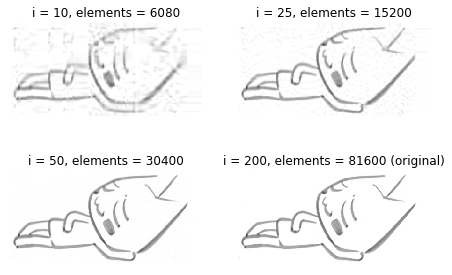

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import copy


with open('Toro.pgm', 'r') as f:
    # Read from pgm file
    A = f.readlines()
    column, row = np.array(A[2].split(' ')).astype('int')
    A = np.array(A[4:]).astype('int').reshape(row, column)

U, s, V = np.linalg.svd(A, full_matrices=True)  # Execute SVD

A_svd = np.zeros((row, column))
A_svd_arr = []
append_interval = np.array([10, 25, 50])

for i, sigma in enumerate(s):
    # Add terms in descending order
    A_svd += s[i] * U[:, i:i+1] * V[i:i+1, :]
    if np.any(append_interval == i):
        A_svd_arr.append(copy.deepcopy(A_svd))

print('Singular values: {}'.format(s[:5]))
# >> Singular values: [ 70325.90261891, 2522.70275689, 2038.5399065, 1889.48437463, 1787.74643761]

# Plot
plt.figure(figsize=(7.5, 5))
for i in range(3):
    plt.subplot(2, 2, i+1, xticks=[], yticks=[])
    plt.title('i = {0}, elements = {1}'.format(append_interval[i],
                                               append_interval[i] * (row + column)))
    plt.axis('off')
    plt.imshow(A_svd_arr[i], cmap='gray', vmin=50, vmax=255)

plt.subplot(2, 2, 4, xticks=[], yticks=[])
plt.title('i = {0}, elements = {1} (original)'.format(len(s), row * column))
plt.axis('off')
plt.imshow(A, cmap='gray', vmin=50, vmax=255)

![Qiita](./fig01.png)

次元を削りすぎると流石に荒っぽい画像になってしまいますが、半分以下に圧縮してもそんなに違和感ないですね. こういった処理のことを主成分分析と呼びます.

特異値分解は線形代数演算ライブラリのベンチマークとして用いられることも多く、線形代数では基本的な処理なのでしょうが、、、今回勉強して初めて応用例が理解できました. 画像の圧縮って案外簡単にできるんですね.

(参考: [特異値分解とその応用](http://www.na.scitec.kobe-u.ac.jp/~yamamoto/lectures/cse-introduction2009/cse-introduction090512.PPT))